https://icasas101.github.io/FinalDSTutorial/ <<<<< This is the link to our website!

# Identifying Bias in the NOPD

By Josh Kellner and Isabella Casas

CMPS 3160 - Introduction to Data Science - Professor Mattei

## Introduction

### Background

The issue of police brutality against black people in our country has, of course, been as widely discussed as ever over the last year because of the widespread abundance of protests against it all over the country. This issue has by no means only been brought up around this time when many people are reckoning with it, but the ability of social media to spread information and set trends so quickly has given the issue a major spotlight. 

Some of the questions we would like to answer are as follows:
1. Are police more likely to question, search, and/or take more severe actions against people of color?
2. Could gender have an effect on how likely someone is to be questioned/searched?
3. Could police be biased against people of certain classes?

In an ideal situation, any unfair biases that are discovered by this project will be used to determine a change in or create policy that would correct these unethical discriminatory actions and prompt city officials to put that policy in place. At the moment, we are focusing on New Orleans but a possible expansion, given that the datasets would be accessible, could be to compare the conclusions that we draw to conclusions drawn from other cities’ data.

### About our dataset

Link to dataset: https://data.nola.gov/Public-Safety-and-Preparedness/Stop-and-Search-Field-Interviews-/kitu-f4uy/data

The Data Center data can be found in our repository.

For our Final Tutorial, we have partnered up to analyze a dataset called “Stop and Search (Field Interviews).” It is filled with data regarding instances of people being questioned by the New Orleans Police Department. Some of the information about these interviews includes when and where it happened, the officer conducting the questioning and potential search, a description of the individual being searched including age, gender, race, height and weight, the reason the interview was conducted, actions taken, etc. We plan to analyze this information in such a way that one can use our analysis to learn about any biases that NOPD has, or a lack thereof, and how these biases manifest themselves. We expect to specifically look at relationships between frequencies of interviews and searches and descriptors of the subjects of these interviews and searches as well as the relationships between the severity of the actions taken by the police and the descriptors of the subjects. The dataset provides information about the car that the subject was driving, if they were driving one, which will be another variable that can shed light on biases.

We also used datasets provided to us by The Data Center that contained data about the demographics of New Orleans. Since we had to request these datasets by email, there is no link, but they can be downloaded at the top of this page.

### Collaboration plan

In terms of a collaboration plan, we have a Github repository set up to keep track of our most up to date work as well as each update. Every two weeks we plan to meet on Zoom to divide specific chunks of work to be done. In these meetings we will review the work we have done since the last meeting and work through things that we couldn’t complete individually, together. 

## Data ETL

### Extraction

Our first step was to import our necessary libaries and then download the data files.

In [207]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [208]:
!head ../FinalDSTutorial/Stop_and_Search__Field_Interviews_.csv
!head ../FinalDSTutorial/Neighborhood profiles data tables.xlsx
!head ../FinalDSTutorial/NOPD_Police_Zones.shp
!head ../FinalDSTutorial/NOPD_Police_Zones.csv

'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.
'head' is not recognized as an internal or external command,
operable program or batch file.


### Load

The first dataset we're loading comes from one of The Data Center's spreadsheets, and will contain information regarding the genders of people living in New Orleans from 2000 and 2014-2018. The "blank" column comes from a spacer column in the original spreadsheet. 

In [209]:
gender_df = pd.read_excel("../FinalDSTutorial/Neighborhood profiles data tables.xlsx",
                          sheet_name='Table 2',
                          names=['Location', 'Female2000', 'Female2014-2018', 'FemaleMOE', 'Blank', 'Male2000', 'Male2014-2018', 'MaleMOE'],
                          header=None)
gender_df = gender_df.dropna(how='all')
# easier to drop these now rather than later
gender_df = gender_df.drop([6, 8, 10, 11])
gender_df = gender_df.set_index('Location')
# must standardize missing data
gender_df = gender_df.replace('NaN%', np.nan)
# these columns did not originally have the correct type
gender_df = gender_df.astype({'Female2000': 'float64', 'Female2014-2018': 'float64', 'FemaleMOE': 'float64'})
display(gender_df)
# checking to ensure correct types are there
display(gender_df.dtypes)

,Female2000,Female2014-2018,FemaleMOE,Blank,Male2000,Male2014-2018,MaleMOE
Location,,,,,,,
Algiers Point,0.520,0.503,0.049,NaN,0.480,0.497,0.033
Audubon,0.530,0.534,0.022,NaN,0.470,0.466,0.017
B.W. Cooper,0.604,0.515,0.048,NaN,0.396,0.485,0.063
Bayou St. John,0.532,0.525,0.030,NaN,0.468,0.475,0.041
Behrman,0.539,0.582,0.028,NaN,0.461,0.418,0.036
...,...,...,...,...,...,...,...
West Lake Forest,0.551,0.537,0.023,NaN,0.449,0.463,0.044
West Riverside,0.535,0.518,0.029,NaN,0.465,0.482,0.037
Whitney,0.545,0.518,0.034,NaN,0.455,0.482,0.128


Female2000         float64
Female2014-2018    float64
FemaleMOE          float64
Blank              float64
Male2000           float64
Male2014-2018      float64
MaleMOE            float64
dtype: object

Also coming from The Data Center, this dataset contains information regarding the racial makeup of each neighborhood of New Orleans.

In [210]:
race_df = pd.read_excel("../FinalDSTutorial/Neighborhood profiles data tables.xlsx",
                          sheet_name='Table 4',
                          names=['Location', 'Black2000', 'Black2014-2018', 'BlackMOE', 'Blank1', 'White2000', 'White2014-2018', 'WhiteMOE', 'Blank2', 'Asian2000', 'Asian2014-2018', 'AsianMOE', 'Blank3', 'AmerIndian2000', 'AmerIndian2014-2018', 'AmerIndianMOE', 'Blank4', 'Biracial2000', 'Biracial2014-2018', 'BiracialMOE', 'Blank5', 'Hispanic2000', 'Hispanic 2013-2017', 'HispanicMOE', 'Blank6', 'Other2000', 'Other2013-2017', 'OtherMOE'],
                          header=None)
race_df = race_df.dropna(how='all')
race_df = race_df.drop([6, 8, 10, 11])
# it was easier to drop these columns now rather than later
race_df = race_df.drop(columns=['Blank1', 'Blank2', 'Blank3', 'Blank4', 'Blank5', 'Blank6'])
race_df = race_df.set_index('Location')
# standardize missing data
race_df = race_df.replace('NaN%', np.nan)
display(race_df)
# displaying types for quality control. For some reason these all were identified correctly the first time.
display(race_df.dtypes)

,Black2000,Black2014-2018,BlackMOE,White2000,White2014-2018,WhiteMOE,Asian2000,Asian2014-2018,AsianMOE,AmerIndian2000,...,AmerIndianMOE,Biracial2000,Biracial2014-2018,BiracialMOE,Hispanic2000,Hispanic 2013-2017,HispanicMOE,Other2000,Other2013-2017,OtherMOE
Location,,,,,,,,,,,,,,,,,,,,,
Algiers Point,0.251,0.086,0.044,0.674,0.816,0.030,0.008,0.003,0.005,0.005,...,0.004,0.010,0.005,0.008,0.047,0.090,0.047,0.005,0.000,0.006
Audubon,0.051,0.071,0.015,0.861,0.736,0.013,0.024,0.055,0.011,0.002,...,0.002,0.015,0.035,0.011,0.044,0.100,0.026,0.003,0.003,0.003
B.W. Cooper,0.984,0.974,0.041,0.002,0.000,0.012,0.000,0.000,0.012,0.000,...,0.012,0.004,0.015,0.014,0.009,0.008,0.013,0.001,0.004,0.014
Bayou St. John,0.678,0.370,0.092,0.267,0.537,0.021,0.009,0.003,0.003,0.004,...,0.004,0.008,0.004,0.004,0.032,0.083,0.036,0.002,0.003,0.005
Behrman,0.774,0.783,0.051,0.128,0.114,0.041,0.016,0.003,0.003,0.002,...,0.003,0.012,0.012,0.013,0.066,0.087,0.039,0.002,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Lake Forest,0.954,0.921,0.017,0.020,0.003,0.003,0.004,0.000,0.004,0.002,...,0.004,0.007,0.014,0.009,0.013,0.053,0.029,0.001,0.009,0.013
West Riverside,0.361,0.204,0.052,0.569,0.730,0.024,0.007,0.011,0.007,0.004,...,0.004,0.014,0.010,0.005,0.042,0.039,0.015,0.003,0.004,0.008
Whitney,0.849,0.786,0.097,0.111,0.168,0.044,0.005,0.022,0.014,0.002,...,0.006,0.009,0.007,0.008,0.023,0.005,0.009,0.000,0.012,0.022


Black2000              float64
Black2014-2018         float64
BlackMOE               float64
White2000              float64
White2014-2018         float64
WhiteMOE               float64
Asian2000              float64
Asian2014-2018         float64
AsianMOE               float64
AmerIndian2000         float64
AmerIndian2014-2018    float64
AmerIndianMOE          float64
Biracial2000           float64
Biracial2014-2018      float64
BiracialMOE            float64
Hispanic2000           float64
Hispanic 2013-2017     float64
HispanicMOE            float64
Other2000              float64
Other2013-2017         float64
OtherMOE               float64
dtype: object

This dataset is the "big one" from the NOPD, and includes information regarding all individuals who were stopped by them. As you can see, there is a ton of missing information and several unnecessary columns for this project, so we will have a lot of cleaning up to do. 

In [211]:
df = pd.read_csv("../FinalDSTutorial/Stop_and_Search__Field_Interviews_.csv", dtype={'FieldInterviewID': int})
display(df.head())
display(df.dtypes)

C:\Users\Isabe\Documents\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (1,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FieldInterviewID,NOPD_Item,EventDate,District,Zone,OfficerAssignment,StopDescription,ActionsTaken,VehicleYear,VehicleMake,...,SubjectWeight,SubjectEyeColor,SubjectHairColor,SubjectDriverLicState,CreatedDateTime,LastModifiedDateTime,Longitude,Latitude,Zip,BlockAddress
0,17415,NaN,01/01/2010 01:11:00 AM,6,E,6th District,TRAFFIC VIOLATION,NaN,2005.0,DODGE,...,160.0,Brown,Black,LA,01/01/2010 01:26:26 AM,NaN,0.0,0.0,NaN,NaN
1,17416,NaN,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,NaN,NaN,...,140.0,Brown,Black,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
2,17416,NaN,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,NaN,NaN,...,145.0,Brown,Black,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
3,17416,NaN,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,NaN,NaN,...,140.0,Brown,Black,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
4,17416,NaN,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,NaN,NaN,...,140.0,Brown,Black,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN


FieldInterviewID           int32
NOPD_Item                 object
EventDate                 object
District                   int64
Zone                      object
OfficerAssignment         object
StopDescription           object
ActionsTaken              object
VehicleYear              float64
VehicleMake               object
VehicleModel              object
VehicleStyle              object
VehicleColor              object
SubjectID                float64
SubjectRace               object
SubjectGender             object
SubjectAge               float64
SubjectHasPhotoID         object
SubjectHeight            float64
SubjectWeight            float64
SubjectEyeColor           object
SubjectHairColor          object
SubjectDriverLicState     object
CreatedDateTime           object
LastModifiedDateTime      object
Longitude                float64
Latitude                 float64
Zip                      float64
BlockAddress              object
dtype: object

Finally, this dataset contains information about the NOPD zones. This is so we can analyze stops based on location later.

,OBJECTID,Zone,Shape_Leng,Shape_Area,geometry
0,1765,1A,6435.352215,2.200386e+06,"POLYGON ((3682345.043 537569.990, 3682348.373 ..."
1,1766,1B,7670.176992,3.484915e+06,"POLYGON ((3682208.123 537799.040, 3682018.873 ..."
2,1767,1C,17522.916885,1.273158e+07,"POLYGON ((3680229.323 541622.219, 3680673.303 ..."
3,1768,1E,8727.211145,4.661121e+06,"POLYGON ((3680275.423 531907.340, 3680017.413 ..."
4,1769,1F,8957.458456,4.933227e+06,"POLYGON ((3681361.653 533335.220, 3681360.213 ..."


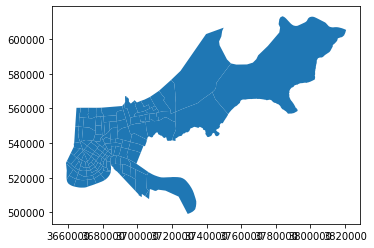

In [212]:
# set the filepath and load in shapefile
map_df = gpd.read_file("../FinalDSTutorial/NOPD_Police_Zones.shp")
# drop unnecessary column
map_df = map_df.drop(columns=['District'])
# check data types
display(map_df.head())
# check map display
map_df.plot()

Now we must also add the file that goes along with this map.

In [213]:
zonesDf = pd.read_csv("../FinalDSTutorial/NOPD_Police_Zones.csv")
display(zonesDf.head())
display(zonesDf.dtypes)

,OBJECTID,Zone,District,Shape_Length,Shape_Area
0,1765,1A,1,6435.352215,2.200386e+06
1,1766,1B,1,7670.176992,3.484915e+06
2,1767,1C,1,17522.916885,1.273158e+07
3,1768,1E,1,8727.211145,4.661121e+06
4,1769,1F,1,8957.458456,4.933227e+06


OBJECTID          int64
Zone             object
District          int64
Shape_Length    float64
Shape_Area      float64
dtype: object

### Transform

Our next step is to clean up our messy NOPD dataset. First, we will drop any columns that will not be necessary for our analysis. Although one of our original questions was about class, and we wanted to use vehicles to somehow designate a person's class, the information in those columns seems to be too inconsistent, so we will drop them for now.

In [214]:
dropped_df = df.drop(columns=['NOPD_Item', 'VehicleYear', 'VehicleMake', 'VehicleModel', 'VehicleStyle', 'VehicleColor', 'SubjectWeight', 'SubjectHeight', 'SubjectEyeColor', 'SubjectHairColor'])
dropped_df.head()

,FieldInterviewID,EventDate,District,Zone,OfficerAssignment,StopDescription,ActionsTaken,SubjectID,SubjectRace,SubjectGender,SubjectAge,SubjectHasPhotoID,SubjectDriverLicState,CreatedDateTime,LastModifiedDateTime,Longitude,Latitude,Zip,BlockAddress
0,17415,01/01/2010 01:11:00 AM,6,E,6th District,TRAFFIC VIOLATION,NaN,20465.0,BLACK,FEMALE,26.0,Yes,LA,01/01/2010 01:26:26 AM,NaN,0.0,0.0,NaN,NaN
1,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20466.0,BLACK,MALE,17.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
2,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20467.0,BLACK,MALE,18.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
3,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20468.0,BLACK,MALE,18.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN
4,17416,01/01/2010 02:06:00 AM,5,D,5th District,CALL FOR SERVICE,NaN,20469.0,BLACK,MALE,30.0,No,NaN,01/01/2010 02:27:38 AM,NaN,0.0,0.0,NaN,NaN


Next, we will change our index to be both FieldInterviewID and SubjectID in order to not have multiple FieldInterview entries, but still be able to see how many individuals were involved in a single interview. We are also going to make sure that missing values are replaced with NaN.

In [215]:
df = dropped_df.set_index(['FieldInterviewID', 'SubjectID'])
df = df.replace('-', np.nan)
df['SubjectGender'] = df['SubjectGender'].fillna('UNKNOWN')
df.head()

EventDate  District Zone  \
FieldInterviewID SubjectID                                          
17415            20465.0    01/01/2010 01:11:00 AM         6    E   
17416            20466.0    01/01/2010 02:06:00 AM         5    D   
                 20467.0    01/01/2010 02:06:00 AM         5    D   
                 20468.0    01/01/2010 02:06:00 AM         5    D   
                 20469.0    01/01/2010 02:06:00 AM         5    D   

                           OfficerAssignment    StopDescription ActionsTaken  \
FieldInterviewID SubjectID                                                     
17415            20465.0       6th  District  TRAFFIC VIOLATION          NaN   
17416            20466.0       5th  District   CALL FOR SERVICE          NaN   
                 20467.0       5th  District   CALL FOR SERVICE          NaN   
                 20468.0       5th  District   CALL FOR SERVICE          NaN   
                 20469.0       5th  District   CALL FOR SERVICE          NaN   

                           SubjectRace SubjectGender  SubjectAge  \
FieldInterviewID SubjectID                                         
17415            20465.0         BLACK        FEMALE        26.0   
17416            20466.0         BLACK          MALE        17.0   
                 20467.0         BLACK          MALE        18.0   
                 20468.0         BLACK          MALE        18.0   
                 20469.0         BLACK          MALE        30.0   

                           SubjectHasPhotoID SubjectDriverLicState  \
FieldInterviewID SubjectID                                           
17415            20465.0                 Yes                    LA   
17416            20466.0                  No                   NaN   
                 20467.0                  No                   NaN   
                 20468.0                  No                   NaN   
                 20469.0                  No                   NaN   

                                   CreatedDateTime LastModifiedDateTime  \
FieldInterviewID SubjectID                                                
17415            20465.0    01/01/2010 01:26:26 AM                  NaN   
17416            20466.0    01/01/2010 02:27:38 AM                  NaN   
                 20467.0    01/01/2010 02:27:38 AM                  NaN   
                 20468.0    01/01/2010 02:27:38 AM                  NaN   
                 20469.0    01/01/2010 02:27:38 AM                  NaN   

                            Longitude  Latitude  Zip BlockAddress  
FieldInterviewID SubjectID                                         
17415            20465.0          0.0       0.0  NaN          NaN  
17416            20466.0          0.0       0.0  NaN          NaN  
                 20467.0          0.0       0.0  NaN          NaN  
                 20468.0          0.0       0.0  NaN          NaN  
                 20469.0          0.0       0.0  NaN          NaN

Now we are ready for some analysis. First, we are going to see what are the most common actions taken against people of a certain race. To begin, we create a list of unique actions to see what categories we will have to do analysis for. 

In [216]:
# create list of unique actions
actionsLst = df.ActionsTaken.unique()
actionsLst

array([nan,
       'Stop Results: Physical Arrest;Subject Type: Passenger;Search Occurred: Yes;Search Types: Vehicle;Search Types: Pat-down;Search Types: Passenger(s);Legal Basises: Probable cause;Legal Basises: Plain view;Evidence Seized: Yes;Evidence Types: Weapon(s)',
       'Stop Results: Citation Issued;Subject Type: Driver;Search Occurred: No;Legal Basises: Probable cause;Evidence Seized: No',
       ...,
       'Stop Results: No action taken;Subject Type: Driver;Search Occurred: Yes;Evidence Seized: No;Legal Basises: Incident to arrest;Legal Basises: Vehicle Exception;Consent To Search: No;Exit Vehicle: Yes;Search Type Pat Down: Yes;Consent Form Completed: No;StripBody Cavity Search: No',
       'Stop Results: Summons Issued;Subject Type: Passenger;Search Occurred: Yes;Evidence Seized: Yes;Evidence Types: Other;Legal Basises: Incident to arrest;Legal Basises: Vehicle Exception;Consent To Search: No;Exit Vehicle: Yes;Search Type Pat Down: Yes;Consent Form Completed: No;StripBody 

We can see that every ActionsTaken column actually has multiple pieces of information per row, so we will need to separate each category into columns of their own later. For now, we will go through the actions list to make sure the terms they use are uniform throughout, since if they are it will make our job easier later.

In [217]:
# making sure the terms they use are uniform throughout. It seems like they are.
count1 = 0
count2 = 0
count3 = 0
count4 = 0

for i in actionsLst:
    if (type(i) is str):
        if ('Stop Results: No action taken' in i):
            count1 += 1
        elif ('Stop Results: no action taken' in i):
            count2 += 1
        elif ('Stop Results: No Action Taken' in i):
            count3 += 1
        elif ('Stop Results: No Action taken' in i):
            count4 += 1
            
print(count1)
print(count2)
print(count3)
print(count4)
    
        
# counting total number of people of each race and gender that was ever stopped in this dataset
amerCount = df['SubjectRace'].value_counts()["AMER. IND."]
asianCount = df['SubjectRace'].value_counts()["ASIAN"]
blackCount = df['SubjectRace'].value_counts()["BLACK"]
hispanicCount = df['SubjectRace'].value_counts()["HISPANIC"]
whiteCount = df['SubjectRace'].value_counts()["WHITE"]
maleCount = df['SubjectGender'].value_counts()["MALE"]
femaleCount = df['SubjectGender'].value_counts()["FEMALE"]
unknownCount = df['SubjectGender'].value_counts()["UNKNOWN"]

# initializing count for actions taken against each race
noActionAmer = noActionAsian = noActionBlack = noActionHispanic = noActionWhite = 0

nanActionAmer = nanActionAsian = nanActionBlack = nanActionHispanic = nanActionWhite = 0

1345
0
0
0


The following cells turn the ActionsTaken column into multiple columns that each represent a single action, so we can create visualizations easier. The visualizations also included actions taken per gender.

In [218]:
numRows = len(df.index)
actionCategories = []
temp = ""
semiBool = True
for i in actionsLst:
    if (type(i) is str):
        semiBool = True
        for j in i:
            
            if (semiBool == True):
                if(j != ":"):
                    temp += j
                else:
                    semiBool = False
                    if (temp not in actionCategories):
                        actionCategories.append(temp)
                    temp = ""
            elif (j == ";"):
                semiBool = True

In [219]:
temp1 = []

for i in range(numRows):
    temp1.append(0)

stopResultsLst = []
subjectTypeLst = []
searchOccurredLst = []
searchTypesLst = []
legalBasisesLst = []
evidenceSeizedLst = []
evidenceTypesLst = []
consentToSearchLst = []
exitVehicleLst = []
searchTypePatDownLst = []
consentFormCompletedLst = []
consentGivenLst = []
stripBodyCavitySearchLst = []
typeOfSearchLst = []
typeOfSearchSupervisorApprovalLst = []

emptyLst = ["-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"]

for index, row in df.iterrows():
    tempLst = emptyLst
    if (type(row["ActionsTaken"]) is str):
        list1 = row["ActionsTaken"].split(':')

        list2 = []

        for i in list1:
            temp = i.split(';')
            for j in temp:
                if (j[0] == ' '):
                    list2.append(j[1:])
                else:
                    list2.append(j)
        for i in (range(len(list2))):
            if (list2[i] in actionCategories):
                if (list2[i] == 'Stop Results'):
                    tempLst[0] = list2[i + 1]
                elif (list2[i] == 'Subject Type'):
                    tempLst[1] = list2[i + 1]
                elif (list2[i] == 'Search Occurred'):
                    tempLst[2] = list2[i + 1]
                elif (list2[i] == 'Search Types'):
                    tempLst[3] = list2[i + 1]
                elif (list2[i] == 'Legal Basises'):
                    tempLst[4] = list2[i + 1]
                elif (list2[i] == 'Evidence Seized'):
                    tempLst[5] = list2[i + 1]
                elif (list2[i] == 'Evidence Types'):
                    tempLst[6] = list2[i + 1]
                elif (list2[i] == 'Consent To Search'):
                    tempLst[7] = list2[i + 1]
                elif (list2[i] == 'Exit Vehicle'):
                    tempLst[8] = list2[i + 1]
                elif (list2[i] == 'Search Type Pat Down'):
                    tempLst[9] = list2[i + 1]
                elif (list2[i] == 'Consent Form Completed'):
                    tempLst[10] = list2[i + 1]
                elif (list2[i] == 'StripBody Cavity Search'):
                    tempLst[11] = list2[i + 1]
                elif (list2[i] == 'Consent Given'):
                    tempLst[12] = list2[i + 1]
                elif (list2[i] == 'Type of Search'):
                    tempLst[13] = list2[i + 1]
                elif (list2[i] == 'Type of Search Supervisor Approval'):
                    tempLst[14] = list2[i + 1]

                    
                    
    stopResultsLst.append(tempLst[0])
    subjectTypeLst.append(tempLst[1])
    searchOccurredLst.append(tempLst[2])
    searchTypesLst.append(tempLst[3])
    legalBasisesLst.append(tempLst[4])
    evidenceSeizedLst.append(tempLst[5])
    evidenceTypesLst.append(tempLst[6])
    consentToSearchLst.append(tempLst[7])
    exitVehicleLst.append(tempLst[8])
    searchTypePatDownLst.append(tempLst[9])
    consentFormCompletedLst.append(tempLst[10])
    stripBodyCavitySearchLst.append(tempLst[11])
    consentGivenLst.append(tempLst[12])
    typeOfSearchLst.append(tempLst[13])
    typeOfSearchSupervisorApprovalLst.append(tempLst[14])

                
df['StopResults'] = stopResultsLst
df['SubjectType'] = subjectTypeLst
df['SearchOccurred'] = searchOccurredLst
df['SearchTypes'] = searchTypesLst
df['LegalBasises'] = legalBasisesLst
df['EvidenceSeized'] = evidenceSeizedLst
df['EvidenceTypes'] = evidenceTypesLst
df['ConsentToSearch'] = consentToSearchLst
df['ExitVehicle'] = exitVehicleLst
df['SearchTypePatDown'] = searchTypePatDownLst
df['ConsentFormCompleted'] = consentFormCompletedLst
df['StripBodyCavitySearch'] = stripBodyCavitySearchLst
df['ConsentGiven'] = consentGivenLst
df['TypeOfSearch'] = typeOfSearchLst
df['TypeOfSearchSupervisorApproval'] = typeOfSearchSupervisorApprovalLst

df.head()

EventDate  District Zone  \
FieldInterviewID SubjectID                                          
17415            20465.0    01/01/2010 01:11:00 AM         6    E   
17416            20466.0    01/01/2010 02:06:00 AM         5    D   
                 20467.0    01/01/2010 02:06:00 AM         5    D   
                 20468.0    01/01/2010 02:06:00 AM         5    D   
                 20469.0    01/01/2010 02:06:00 AM         5    D   

                           OfficerAssignment    StopDescription ActionsTaken  \
FieldInterviewID SubjectID                                                     
17415            20465.0       6th  District  TRAFFIC VIOLATION          NaN   
17416            20466.0       5th  District   CALL FOR SERVICE          NaN   
                 20467.0       5th  District   CALL FOR SERVICE          NaN   
                 20468.0       5th  District   CALL FOR SERVICE          NaN   
                 20469.0       5th  District   CALL FOR SERVICE          NaN   

                           SubjectRace SubjectGender  SubjectAge  \
FieldInterviewID SubjectID                                         
17415            20465.0         BLACK        FEMALE        26.0   
17416            20466.0         BLACK          MALE        17.0   
                 20467.0         BLACK          MALE        18.0   
                 20468.0         BLACK          MALE        18.0   
                 20469.0         BLACK          MALE        30.0   

                           SubjectHasPhotoID  ... EvidenceSeized  \
FieldInterviewID SubjectID                    ...                  
17415            20465.0                 Yes  ...              -   
17416            20466.0                  No  ...              -   
                 20467.0                  No  ...              -   
                 20468.0                  No  ...              -   
                 20469.0                  No  ...              -   

                           EvidenceTypes ConsentToSearch  ExitVehicle  \
FieldInterviewID SubjectID                                              
17415            20465.0               -               -            -   
17416            20466.0               -               -            -   
                 20467.0               -               -            -   
                 20468.0               -               -            -   
                 20469.0               -               -            -   

                            SearchTypePatDown  ConsentFormCompleted  \
FieldInterviewID SubjectID                                            
17415            20465.0                    -                     -   
17416            20466.0                    -                     -   
                 20467.0                    -                     -   
                 20468.0                    -                     -   
                 20469.0                    -                     -   

                           StripBodyCavitySearch ConsentGiven TypeOfSearch  \
FieldInterviewID SubjectID                                                   
17415            20465.0                       -            -            -   
17416            20466.0                       -            -            -   
                 20467.0                       -            -            -   
                 20468.0                       -            -            -   
                 20469.0                       -            -            -   

                           TypeOfSearchSupervisorApproval  
FieldInterviewID SubjectID                                 
17415            20465.0                                -  
17416            20466.0                                -  
                 20467.0                                -  
                 20468.0                                -  
                 20469.0                                -  

[5 rows x 32 columns]

### Exploratory Analysis

Now for some visualization! The following bar graphs use a simple count to allow us to visualize how frequently each type of action occurs per race.

Here we see when no actions were taken by race and gender.

In [12]:
noAmer = noAsian = noBlack = noHispanic = noWhite = noFemale = noMale = noUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "No action taken"):
        if (row['SubjectRace'] == "AMER. IND."):
            noAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            noAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            noBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            noHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            noWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            noFemale += 1
        if (row['SubjectGender'] == "MALE"):
            noMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            noUnknown += 1
            
noAmerPer = (noAmer / amerCount) * 100
noAsianPer = (noAsian / asianCount) * 100
noBlackPer = (noBlack / blackCount) * 100
noHispanicPer = (noHispanic / hispanicCount) * 100
noWhitePer = (noWhite / whiteCount) * 100

noFemalePer = (noFemale / femaleCount) * 100
noMalePer = (noMale / maleCount) * 100
noUnknownPer = (noUnknown / unknownCount) * 100

noPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in No action taken": [noAsianPer, noBlackPer, noHispanicPer, noAmerPer, noWhitePer]}
noPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in No action taken": [noFemalePer, noMalePer, noUnknownPer]}

noRaceDf = pd.DataFrame(noPerDict).set_index('Race')
noGenderDf = pd.DataFrame(noPerDictGender).set_index('Gender')


noRaceDf.plot.bar()
noGenderDf.plot.bar()

This graph shows the percentage of interactions that did not have a specified result.

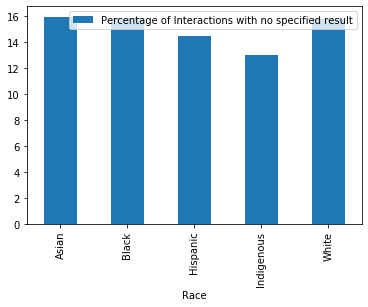

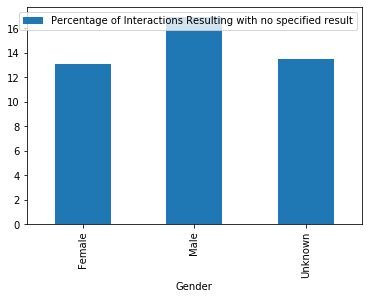

In [13]:
nanAmer = nanAsian = nanBlack = nanHispanic = nanWhite = nanFemale = nanMale = nanUnknown = 0

for index, row in df.iterrows():
    if ((row["StopResults"] == "-")):
        if (row['SubjectRace'] == "AMER. IND."):
            nanAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            nanAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            nanBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            nanHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            nanWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            nanFemale += 1
        if (row['SubjectGender'] == "MALE"):
            nanMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            nanUnknown += 1
            
            
nanAmerPer = (nanAmer / amerCount) * 100
nanAsianPer = (nanAsian / asianCount) * 100
nanBlackPer = (nanBlack / blackCount) * 100
nanHispanicPer = (nanHispanic / hispanicCount) * 100
nanWhitePer = (nanWhite / whiteCount) * 100

nanFemalePer = (nanFemale / femaleCount) * 100
nanMalePer = (nanMale / maleCount) * 100
nanUnknownPer = (nanUnknown / unknownCount) * 100

nanPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions with no specified result": [nanAsianPer, nanBlackPer, nanHispanicPer, nanAmerPer, nanWhitePer]}
nanPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting with no specified result": [nanFemalePer, nanMalePer, nanUnknownPer]}

nanRaceDf = pd.DataFrame(nanPerDict).set_index('Race')
nanGenderDf = pd.DataFrame(nanPerDictGender).set_index('Gender')


nanRaceDf.plot.bar()
nanGenderDf.plot.bar()

Here we can see who received verbal warnings.

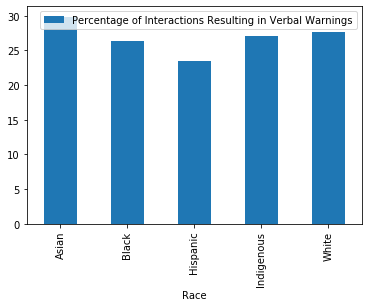

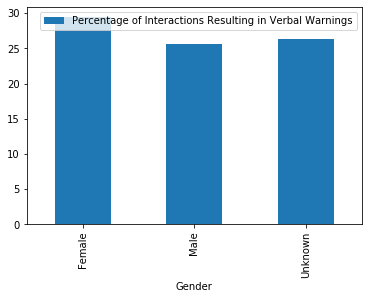

In [14]:
verbalWarningAmer = verbalWarningAsian = verbalWarningBlack = verbalWarningHispanic = verbalWarningWhite = verbalWarningFemale = verbalWarningMale = verbalWarningUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "Verbal Warning"):
        if (row['SubjectRace'] == "AMER. IND."):
            verbalWarningAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            verbalWarningAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            verbalWarningBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            verbalWarningHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            verbalWarningWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            verbalWarningFemale += 1
        if (row['SubjectGender'] == "MALE"):
            verbalWarningMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            verbalWarningUnknown += 1
            
verbalWarningAmerPer = (verbalWarningAmer / amerCount) * 100
verbalWarningAsianPer = (verbalWarningAsian / asianCount) * 100
verbalWarningBlackPer = (verbalWarningBlack / blackCount) * 100
verbalWarningHispanicPer = (verbalWarningHispanic / hispanicCount) * 100
verbalWarningWhitePer = (verbalWarningWhite / whiteCount) * 100

verbalWarningFemalePer = (verbalWarningFemale / femaleCount) * 100
verbalWarningMalePer = (verbalWarningMale / maleCount) * 100
verbalWarningUnknownPer = (verbalWarningUnknown / unknownCount) * 100

verbalWarningPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in Verbal Warnings": [verbalWarningAsianPer, verbalWarningBlackPer, verbalWarningHispanicPer, verbalWarningAmerPer, verbalWarningWhitePer]}
verbalWarningPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in Verbal Warnings": [verbalWarningFemalePer, verbalWarningMalePer, verbalWarningUnknownPer]}

verbalWarningRaceDf = pd.DataFrame(verbalWarningPerDict).set_index('Race')
verbalWarningGenderDf = pd.DataFrame(verbalWarningPerDictGender).set_index('Gender')


verbalWarningRaceDf.plot.bar()
verbalWarningGenderDf.plot.bar()

This graph shows who received a citation.

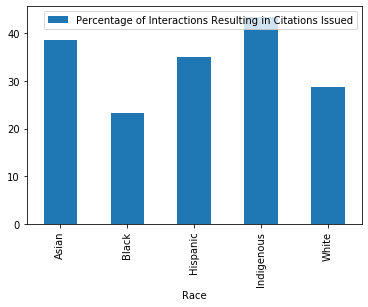

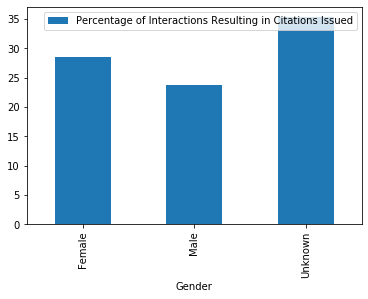

In [15]:
citationAmer = citationAsian = citationBlack = citationHispanic = citationWhite = citationFemale = citationMale = citationUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "Citation Issued"):
        if (row['SubjectRace'] == "AMER. IND."):
            citationAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            citationAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            citationBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            citationHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            citationWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            citationFemale += 1
        if (row['SubjectGender'] == "MALE"):
            citationMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            citationUnknown += 1
            
citationAmerPer = (citationAmer / amerCount) * 100
citationAsianPer = (citationAsian / asianCount) * 100
citationBlackPer = (citationBlack / blackCount) * 100
citationHispanicPer = (citationHispanic / hispanicCount) * 100
citationWhitePer = (citationWhite / whiteCount) * 100

citationFemalePer = (citationFemale / femaleCount) * 100
citationMalePer = (citationMale / maleCount) * 100
citationUnknownPer = (citationUnknown / unknownCount) * 100

citationPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in Citations Issued": [citationAsianPer, citationBlackPer, citationHispanicPer, citationAmerPer, citationWhitePer]}
citationPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in Citations Issued": [citationFemalePer, citationMalePer, citationUnknownPer]}

citationRaceDf = pd.DataFrame(citationPerDict).set_index('Race')
citationGenderDf = pd.DataFrame(citationPerDictGender).set_index('Gender')


citationRaceDf.plot.bar()
citationGenderDf.plot.bar()

This chart shows who received a summons.

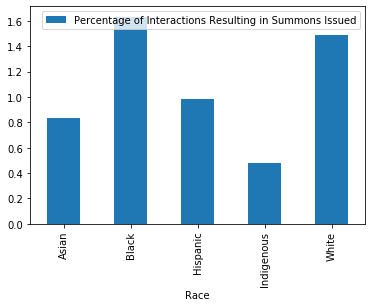

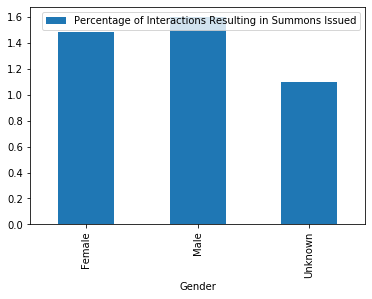

In [16]:
summonsAmer = summonsAsian = summonsBlack = summonsHispanic = summonsWhite = summonsFemale = summonsMale = summonsUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "Summons Issued"):
        if (row['SubjectRace'] == "AMER. IND."):
            summonsAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            summonsAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            summonsBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            summonsHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            summonsWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            summonsFemale += 1
        if (row['SubjectGender'] == "MALE"):
            summonsMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            summonsUnknown += 1
            
summonsAmerPer = (summonsAmer / amerCount) * 100
summonsAsianPer = (summonsAsian / asianCount) * 100
summonsBlackPer = (summonsBlack / blackCount) * 100
summonsHispanicPer = (summonsHispanic / hispanicCount) * 100
summonsWhitePer = (summonsWhite / whiteCount) * 100

summonsFemalePer = (summonsFemale / femaleCount) * 100
summonsMalePer = (summonsMale / maleCount) * 100
summonsUnknownPer = (summonsUnknown / unknownCount) * 100

summonsPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in Summons Issued": [summonsAsianPer, summonsBlackPer, summonsHispanicPer, summonsAmerPer, summonsWhitePer]}
summonsPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in Summons Issued": [summonsFemalePer, summonsMalePer, summonsUnknownPer]}

summonsRaceDf = pd.DataFrame(summonsPerDict).set_index('Race')
summonsGenderDf = pd.DataFrame(summonsPerDictGender).set_index('Gender')


summonsRaceDf.plot.bar()
summonsGenderDf.plot.bar()

This graph shows stops that resulted in Law Enforcement Assisted Diversion, or L.E.A.D.. This action allows NOPD officers to divert individuals who are about to be arrested for a "low-level, non-violent municipal offense to intensive case management when the alleged offense is believed to be a product of underlying mental illness, substance abuse, or social challenges." See https://nola.gov/health-department/behavioral-health/lead/#:~:text=LEAD%20provides%20NOPD%20officers%20in,illness%2C%20substance%20abuse%2C%20or%20social for more information. 

This particular action is notable in that we can see how extremely rare it is for it to occur.

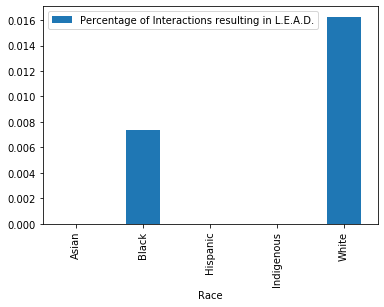

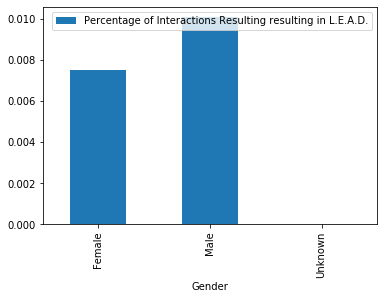

In [17]:
leadAmer = leadAsian = leadBlack = leadHispanic = leadWhite = leadFemale = leadMale = leadUnknown = 0

for index, row in df.iterrows():
    if ((row["StopResults"] == "L.E.A.D.")):
        if (row['SubjectRace'] == "AMER. IND."):
            leadAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            leadAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            leadBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            leadHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            leadWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            leadFemale += 1
        if (row['SubjectGender'] == "MALE"):
            leadMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            leadUnknown += 1
            
            
leadAmerPer = (leadAmer / amerCount) * 100
leadAsianPer = (leadAsian / asianCount) * 100
leadBlackPer = (leadBlack / blackCount) * 100
leadHispanicPer = (leadHispanic / hispanicCount) * 100
leadWhitePer = (leadWhite / whiteCount) * 100

leadFemalePer = (leadFemale / femaleCount) * 100
leadMalePer = (leadMale / maleCount) * 100
leadUnknownPer = (leadUnknown / unknownCount) * 100

leadPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions resulting in L.E.A.D.": [leadAsianPer, leadBlackPer, leadHispanicPer, leadAmerPer, leadWhitePer]}
leadPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting resulting in L.E.A.D.": [leadFemalePer, leadMalePer, leadUnknownPer]}

leadRaceDf = pd.DataFrame(leadPerDict).set_index('Race')
leadGenderDf = pd.DataFrame(leadPerDictGender).set_index('Gender')


leadRaceDf.plot.bar()
leadGenderDf.plot.bar()

This graph shows what stops resulted in searches.

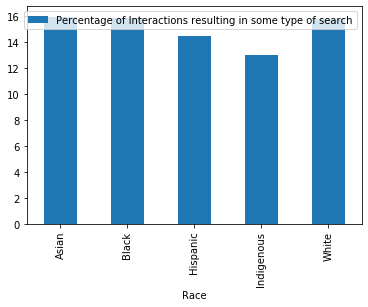

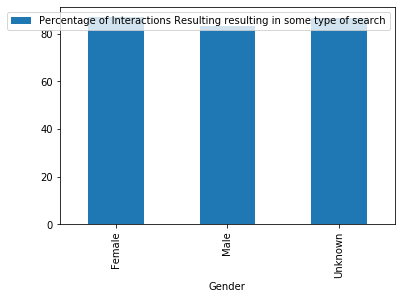

In [18]:
searchAmer = searchAsian = searchBlack = searchHispanic = searchWhite = searchFemale = searchMale = searchUnknown = 0

for index, row in df.iterrows():
    if ((row["SearchTypes"] == "-")):
        if (row['SubjectRace'] == "AMER. IND."):
            searchAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            searchAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            searchBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            searchHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            searchWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            searchFemale += 1
        if (row['SubjectGender'] == "MALE"):
            searchMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            searchUnknown += 1
            
            
searchAmerPer = ((searchAmer / amerCount) * 100)
searchAsianPer = ((searchAsian / asianCount) * 100)
searchBlackPer = ((searchBlack / blackCount) * 100)
searchHispanicPer = ((searchHispanic / hispanicCount) * 100)
searchWhitePer = ((searchWhite / whiteCount) * 100)

searchFemalePer = (100 - (searchFemale / femaleCount) * 100)
searchMalePer = (100 - (searchMale / maleCount) * 100)
searchUnknownPer = (100 - (searchUnknown / unknownCount) * 100)

searchPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions resulting in some type of search": [searchAsianPer, searchBlackPer, searchHispanicPer, searchAmerPer, searchWhitePer]}
searchPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting resulting in some type of search": [searchFemalePer, searchMalePer, searchUnknownPer]}

searchRaceDf = pd.DataFrame(searchPerDict).set_index('Race')
searchGenderDf = pd.DataFrame(searchPerDictGender).set_index('Gender')


searchRaceDf.plot.bar()
searchGenderDf.plot.bar()

And finally, this chart shows who got arrested.

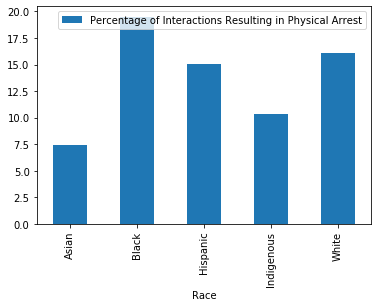

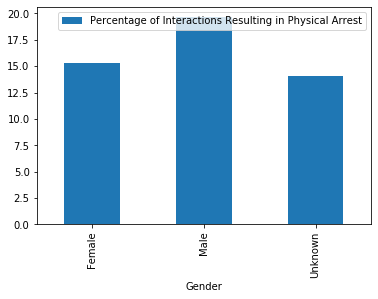

In [19]:
arrestAmer = arrestAsian = arrestBlack = arrestHispanic = arrestWhite = arrestFemale = arrestMale = arrestUnknown = 0

for index, row in df.iterrows():
    if (row["StopResults"] == "Physical Arrest"):
        if (row['SubjectRace'] == "AMER. IND."):
            arrestAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            arrestAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            arrestBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            arrestHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            arrestWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            arrestFemale += 1
        if (row['SubjectGender'] == "MALE"):
            arrestMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            arrestUnknown += 1
            
arrestAmerPer = (arrestAmer / amerCount) * 100
arrestAsianPer = (arrestAsian / asianCount) * 100
arrestBlackPer = (arrestBlack / blackCount) * 100
arrestHispanicPer = (arrestHispanic / hispanicCount) * 100
arrestWhitePer = (arrestWhite / whiteCount) * 100

arrestFemalePer = (arrestFemale / femaleCount) * 100
arrestMalePer = (arrestMale / maleCount) * 100
arrestUnknownPer = (arrestUnknown / unknownCount) * 100

arrestPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in Physical Arrest": [arrestAsianPer, arrestBlackPer, arrestHispanicPer, arrestAmerPer, arrestWhitePer]}
arrestPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in Physical Arrest": [arrestFemalePer, arrestMalePer, arrestUnknownPer]}

arrestRaceDf = pd.DataFrame(arrestPerDict).set_index('Race')
arrestGenderDf = pd.DataFrame(arrestPerDictGender).set_index('Gender')


arrestRaceDf.plot.bar()
arrestGenderDf.plot.bar()

This graph differs slightly from its predecessors in that it finds not just the percentage of traffic stops, but specifically the percentage of traffic stops that resulted in some sort of search. 

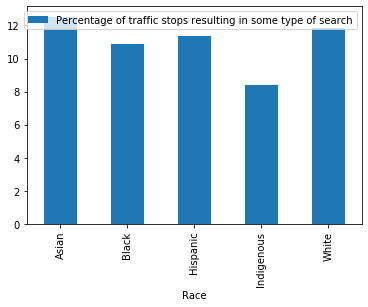

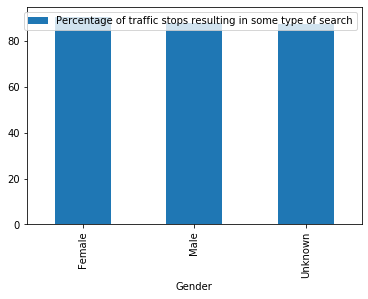

In [20]:
trafficSearchAmer = trafficSearchAsian = trafficSearchBlack = trafficSearchHispanic = trafficSearchWhite = trafficSearchFemale = trafficSearchMale = trafficSearchUnknown = 0
trafficStopAmer = trafficStopAsian = trafficStopBlack = trafficStopHispanic = trafficStopWhite = trafficStopFemale = trafficStopMale = trafficStopUnknown = 0

for index, row in df.iterrows():
    if (row["StopDescription"] == "TRAFFIC VIOLATION"):
        if (row['SubjectRace'] == "AMER. IND."):
            trafficStopAmer += 1
        elif (row['SubjectRace'] == "ASIAN"):
            trafficStopAsian += 1
        elif (row['SubjectRace'] == "BLACK"):
            trafficStopBlack += 1
        elif (row['SubjectRace'] == "HISPANIC"):
            trafficStopHispanic += 1
        elif (row['SubjectRace'] == "WHITE"):
            trafficStopWhite += 1
        if (row['SubjectGender'] == "FEMALE"):
            trafficStopFemale += 1
        if (row['SubjectGender'] == "MALE"):
            trafficStopMale += 1
        if ((row['SubjectGender'] == "UNKNOWN")):
            trafficStopUnknown += 1    
        if ((row["StopResults"] != "No action taken") and (row["StopResults"] == "-")):
            if (row['SubjectRace'] == "AMER. IND."):
                trafficSearchAmer += 1
            elif (row['SubjectRace'] == "ASIAN"):
                trafficSearchAsian += 1
            elif (row['SubjectRace'] == "BLACK"):
                trafficSearchBlack += 1
            elif (row['SubjectRace'] == "HISPANIC"):
                trafficSearchHispanic += 1
            elif (row['SubjectRace'] == "WHITE"):
                trafficSearchWhite += 1
            if (row['SubjectGender'] == "FEMALE"):
                trafficSearchFemale += 1
            if (row['SubjectGender'] == "MALE"):
                trafficSearchMale += 1
            if ((row['SubjectGender'] == "UNKNOWN")):
                trafficSearchUnknown += 1           
            
trafficSearchAmerPer = ((trafficSearchAmer / trafficStopAmer) * 100)
trafficSearchAsianPer = ((trafficSearchAsian / trafficStopAsian) * 100)
trafficSearchBlackPer = ((trafficSearchBlack / trafficStopBlack) * 100)
trafficSearchHispanicPer = ((trafficSearchHispanic / trafficStopHispanic) * 100)
trafficSearchWhitePer = ((trafficSearchWhite / trafficStopWhite) * 100)

trafficSearchFemalePer = (100 - (trafficSearchFemale / trafficStopFemale) * 100)
trafficSearchMalePer = (100 - (trafficSearchMale / trafficStopMale) * 100)
trafficSearchUnknownPer = (100 - (trafficSearchUnknown / trafficStopUnknown) * 100)

trafficSearchPerDict = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of traffic stops resulting in some type of search": [trafficSearchAsianPer, trafficSearchBlackPer, trafficSearchHispanicPer, trafficSearchAmerPer, trafficSearchWhitePer]}
trafficSearchPerDictGender = {"Gender": ["Female", "Male", "Unknown"], "Percentage of traffic stops resulting in some type of search": [trafficSearchFemalePer, trafficSearchMalePer, trafficSearchUnknownPer]}

trafficSearchRaceDf = pd.DataFrame(trafficSearchPerDict).set_index('Race')
trafficSearchGenderDf = pd.DataFrame(trafficSearchPerDictGender).set_index('Gender')



trafficSearchRaceDf.plot.bar()
trafficSearchGenderDf.plot.bar()

Unfortunately for many of these analyses, we do not have great data regarding gender because there are high amounts of "unknown" genders recorded. However, we can still use the demographic information we have to see whether the stops per race are proportional to the racial makeup of this city.

To prepare for this, we will begin work on the gender dataset since there are only three attributes at play - "male", "female", and "unknown". This will include cleaning it up by dropping unnecessary columns and changing the dtype for some columns.

In [21]:
gender_df = gender_df.dropna(how='all')
gender_df = gender_df.drop(columns=['Blank'])

In [22]:
display(gender_df)
display(gender_df.dtypes)

,Female2000,Female2014-2018,FemaleMOE,Male2000,Male2014-2018,MaleMOE
Location,,,,,,
Algiers Point,0.520,0.503,0.049,0.480,0.497,0.033
Audubon,0.530,0.534,0.022,0.470,0.466,0.017
B.W. Cooper,0.604,0.515,0.048,0.396,0.485,0.063
Bayou St. John,0.532,0.525,0.030,0.468,0.475,0.041
Behrman,0.539,0.582,0.028,0.461,0.418,0.036
...,...,...,...,...,...,...
West Lake Forest,0.551,0.537,0.023,0.449,0.463,0.044
West Riverside,0.535,0.518,0.029,0.465,0.482,0.037
Whitney,0.545,0.518,0.034,0.455,0.482,0.128


Female2000         float64
Female2014-2018    float64
FemaleMOE          float64
Male2000           float64
Male2014-2018      float64
MaleMOE            float64
dtype: object

After cleaning up this dataset a little, we can move onto more data analysis. Our first analysis is a simple test to see if we can extract any useful information based on a subject's gender. Below is a simple pie chart that shows roughly how many men vs how many women were stopped by police in total.

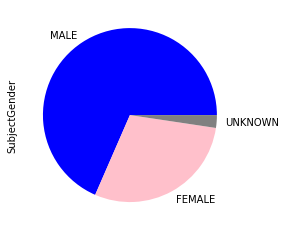

In [23]:
df['SubjectGender'].value_counts().plot.pie(colors=['blue', 'pink', 'gray'])

This pie chart compares the percentage of women and men located in the city of New Orleans.

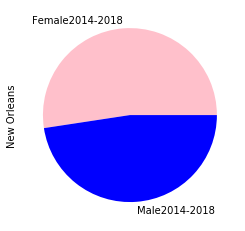

In [24]:
NewOrleansGenders = gender_df[['Female2014-2018', 'Male2014-2018']]
display(NewOrleansGenders.loc['New Orleans'].plot.pie(y='Gender in New Orleans, 2014-2018', colors=['pink', 'blue']))

From this simple comparison, we can see that the number of males that are stopped by police exceeds what should be considered proportional. If the number of men stopped were proportional to the population of the city, then roughly 50% of these stops would have been males. 

Now we need to clean up the race dataframe and exclude data that came from years we don't need.

In [25]:
clean_race_df = race_df.drop(columns=['Black2000', 'BlackMOE', 'White2000', 'WhiteMOE', 'Asian2000', 'AsianMOE', 'AmerIndian2000', 'AmerIndianMOE', 'Biracial2000', 'BiracialMOE', 'Hispanic2000', 'HispanicMOE', 'Other2000', 'OtherMOE'])

Now we can create a bar graph showing the total percentages of each action taken by race.

,Percentage of Interactions Resulting in No action taken,Percentage of Interactions with no specified result,Percentage of Interactions Resulting in Verbal Warnings,Percentage of Interactions Resulting in Citations Issued,Percentage of Interactions Resulting in Summons Issued,Percentage of Interactions resulting in L.E.A.D.,Percentage of Interactions resulting in some type of search,Percentage of Interactions Resulting in Physical Arrest,Percentage of traffic stops resulting in some type of search
Race,,,,,,,,,
Asian,7.380074,15.982472,29.866236,38.491697,0.830258,0.000000,15.982472,7.449262,12.529481
Black,13.253609,15.913364,26.409528,23.282180,1.632524,0.007364,15.913364,19.501431,10.885210
Hispanic,10.868886,14.479355,23.536761,35.111500,0.986945,0.000000,14.479355,15.016553,11.380035
Indigenous,5.555556,13.043478,27.053140,43.478261,0.483092,0.000000,13.043478,10.386473,8.414239
White,10.250398,15.781520,27.707790,28.651781,1.486125,0.016264,15.781520,16.106123,11.863654


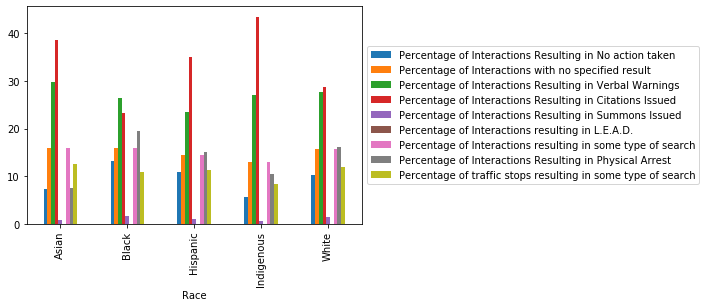

In [35]:
comp1 = pd.merge(noRaceDf, nanRaceDf, left_index=True, right_index=True)
comp2 = pd.merge(comp1, verbalWarningRaceDf, left_index=True, right_index=True)
comp3 = pd.merge(comp2, citationRaceDf, left_index=True, right_index=True)
comp4 = pd.merge(comp3, summonsRaceDf, left_index=True, right_index=True)
comp5 = pd.merge(comp4, leadRaceDf, left_index=True, right_index=True)
comp6 = pd.merge(comp5, searchRaceDf, left_index=True, right_index=True)
comp7 = pd.merge(comp6, arrestRaceDf, left_index=True, right_index=True)
comp8 = pd.merge(comp7, trafficSearchRaceDf, left_index=True, right_index=True)

display(comp8)
comp8.plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [29]:
def graph(action, year):

    x1 = x2 = x3 = x4 = x5 = x6 = x7 = x8 = 0

    for index, row in df.iterrows():
        if ((row["StopResults"] == action) and (row["EventDate"][6:10] == year)):
            if (row['SubjectRace'] == "AMER. IND."):
                x1 += 1
            elif (row['SubjectRace'] == "ASIAN"):
                x2 += 1
            elif (row['SubjectRace'] == "BLACK"):
                x3 += 1
            elif (row['SubjectRace'] == "HISPANIC"):
                x4 += 1
            elif (row['SubjectRace'] == "WHITE"):
                x5 += 1
            if (row['SubjectGender'] == "FEMALE"):
                x6 += 1
            if (row['SubjectGender'] == "MALE"):
                x7 += 1
            if ((row['SubjectGender'] == "UNKNOWN")):
                x8 += 1

    y1 = (x1 / amerCount) * 100 
    y2 = (x2 / asianCount) * 100
    y3 = (x3 / blackCount) * 100
    y4 = (x4 / hispanicCount) * 100
    y5 = (x5 / whiteCount) * 100

    y6 = (x6 / femaleCount) * 100
    y7 = (x7 / maleCount) * 100
    y8 = (x8 / unknownCount) * 100

    z1 = {"Race": ["Asian", "Black", "Hispanic", "Indigenous", "White"], "Percentage of Interactions Resulting in " + action + " in " + year: [y2, y3, y4, y1, y5]}
    z2 = {"Gender": ["Female", "Male", "Unknown"], "Percentage of Interactions Resulting in " + action + " in " + year: [y6, y7, y8]}

    a1 = pd.DataFrame(z1).set_index('Race')
    a2 = pd.DataFrame(z2).set_index('Gender')


    a1.plot.bar()
    #a2.plot.bar()

KeyboardInterrupt: 

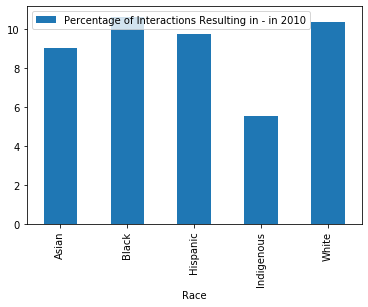

In [30]:
for i in range(2010, 2021):
    for j in df.StopResults.unique():
        graph(j, str(i))

For comparison, here is the population of New Orleans by race from 2014-2018; we do not know why two of these racial categories are not from the same timeframe, but this should not impact our comparison too much. 

Black2014-2018         59.0
White2014-2018         30.6
Asian2014-2018          2.9
AmerIndian2014-2018     0.1
Biracial2014-2018       1.5
Hispanic 2013-2017      5.5
Other2013-2017          0.4
Name: New Orleans, dtype: float64

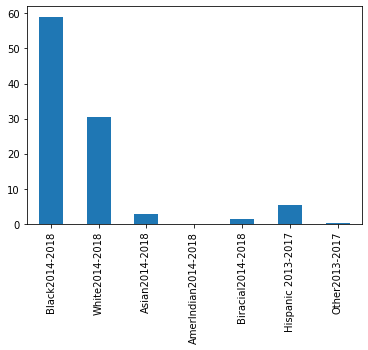

In [28]:
NOLA_race_percentage = clean_race_df.loc['New Orleans']*100
display(NOLA_race_percentage)
NOLA_race_percentage.plot.bar(x = 'Race and year')

The following print statement shows the raw data from the New Orleans row of the demographic dataset. Below that, we will use this information to further compare the population of people in the traffic stops with the population of New Orleans.

In [31]:
print(race_df.iloc[72])
blackPer = race_df.iloc[72]["Black2014-2018"]
whitePer = race_df.iloc[72]["White2014-2018"]
asianPer = race_df.iloc[72]["Asian2014-2018"]
amerPer = race_df.iloc[72]["AmerIndian2014-2018"]
hispanicPer = race_df.iloc[72]["Hispanic 2013-2017"]

Black2000              0.667
Black2014-2018         0.590
BlackMOE               0.002
White2000              0.266
White2014-2018         0.306
WhiteMOE               0.000
Asian2000              0.023
Asian2014-2018         0.029
AsianMOE               0.001
AmerIndian2000         0.002
AmerIndian2014-2018    0.001
AmerIndianMOE          0.000
Biracial2000           0.010
Biracial2014-2018      0.015
BiracialMOE            0.002
Hispanic2000           0.031
Hispanic 2013-2017     0.055
HispanicMOE            0.000
Other2000              0.002
Other2013-2017         0.004
OtherMOE               0.001
Name: New Orleans, dtype: float64


In [81]:
percentageLst = []
proportionLst = []
for i in df.StopResults.unique():
    print(i)
    print(df[df.StopResults == i]["SubjectRace"].value_counts())
    theSum = 0
    for j in df[df.StopResults == i]["SubjectRace"].value_counts():
        theSum += j
    print("")
    count = 0
    for k in df[df.StopResults == i]["SubjectRace"].value_counts():
        percentage = k / theSum
        if (count == 0):
            curRace = "Black"
        elif (count == 1):
            curRace = "White"
        elif (count == 2):
            curRace = "Hispanic"
        elif (count == 3):
            curRace = "Asian"
        elif (count == 5):
            curRace = "American Indian"
        if (count != 4):
            print(curRace, " percentage: ", percentage)
            percentageLst.append(percentage)
        proportion = 0
        if (count == 0):
            proportion = percentage / blackPer
            print("Proportion = ", proportion)
            proportionLst.append(proportion)
        elif (count == 1):
            proportion = percentage / whitePer
            print("Proportion = ", proportion)
            proportionLst.append(proportion)
        elif (count == 2):
            proportion = percentage / hispanicPer
            print("Proportion = ", proportion)
            proportionLst.append(proportion)
        elif (count == 3):
            proportion = percentage / asianPer
            print("Proportion = ", proportion)
            proportionLst.append(proportion)
        elif (count == 5):
            proportion = percentage / amerPer
            print("Proportion = ", proportion)
            proportionLst.append(proportion)
        count += 1
    print("")
    print("")
    print("")

-
BLACK         64832
WHITE         23288
HISPANIC       2318
ASIAN           693
UNKNOWN         333
AMER. IND.       54
Name: SubjectRace, dtype: int64

Black  percentage:  0.708407089315763
Proportion =  1.2006899818911239
White  percentage:  0.2544636027885225
Proportion =  0.8315804012696814
Hispanic  percentage:  0.02532835070696475
Proportion =  0.4605154673993591
Asian  percentage:  0.007572280862781092
Proportion =  0.261113133199348
American Indian  percentage:  0.0005900478594374877
Proportion =  0.5900478594374876



Physical Arrest
BLACK         79450
WHITE         23767
HISPANIC       2404
ASIAN           323
UNKNOWN         287
AMER. IND.       43
Name: SubjectRace, dtype: int64

Black  percentage:  0.7475958371756027
Proportion =  1.2671115884332251
White  percentage:  0.22363889568473944
Proportion =  0.7308460643292138
Hispanic  percentage:  0.022620772719573932
Proportion =  0.41128677671952607
Asian  percentage:  0.003039313472721456
Proportion =  0.1048039128524639

If the rate at which certain races are stopped is proportional to the population of the city, then the following visualizations should show a 1:1 ratio between the two numbers.

,Black,White,Hispanic,Asian,American Indian
Unspecified,0.708407,0.254464,0.025328,0.007572,0.000590
Physical Arrest,0.747596,0.223639,0.022621,0.003039,0.000405
Citations,0.647965,0.288825,0.038398,0.012180,0.001230
Verbal Warning,0.694106,0.263768,0.024308,0.008741,0.000723
No Action,0.754862,0.211461,0.024325,0.004557,0.000322
Summons,0.733135,0.241733,0.017416,0.003968,0.000220
L.E.A.D.,0.555556,0.444444,NaN,NaN,NaN


,Black,White,Hispanic,Asian,American Indian
Unspecified,1.200690,0.831580,0.460515,0.261113,0.590048
Physical Arrest,1.267112,0.730846,0.411287,0.104804,0.404614
Citations,1.098246,0.943874,0.698154,0.420004,1.229626
Verbal Warning,1.176450,0.861988,0.441963,0.301425,0.722529
No Action,1.279426,0.691048,0.442275,0.157154,0.321539
Summons,1.242602,0.789976,0.316659,0.136836,0.220459
L.E.A.D.,0.941620,1.452433,NaN,NaN,NaN


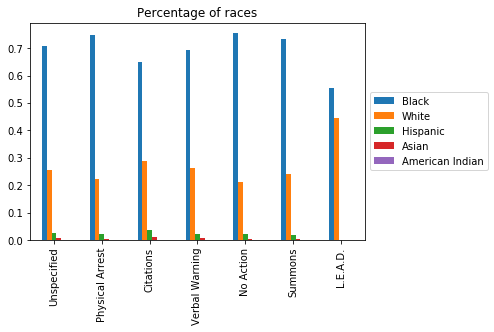

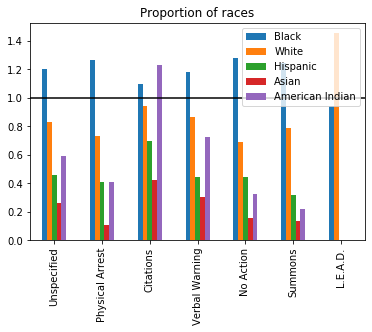

In [119]:
import matplotlib.pyplot as  plt

keys = ["Black", "White", "Hispanic", "Asian", "American Indian"]

# gathering values of percentages into list
for val in percentageLst:
    idkVals = percentageLst[0:5]
    physArrestVals = percentageLst[5:10]
    citationVals = percentageLst[10:15]
    verbalVals = percentageLst[15:20]
    noneVals =  percentageLst[20:25]
    summonsVals = percentageLst[25:30]
    leadVals = percentageLst[30:32]
    
# making large list to use for dataframe
bigPerLst = [idkVals, physArrestVals, citationVals, verbalVals, noneVals, summonsVals, leadVals]
    
# creating and displaying dataframe plus bar chart
percentDf = pd.DataFrame(bigPerLst, index = ['Unspecified', 'Physical Arrest', 'Citations', 'Verbal Warning', 'No Action', 'Summons', 'L.E.A.D.'], columns=["Black", "White", "Hispanic", "Asian", "American Indian"])
display(percentDf)
percentDf.plot.bar(title="Percentage of races").legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

# same as above, but for proportions
for value in proportionLst:
    idkVals2 = proportionLst[0:5]
    physArrestVals2 = proportionLst[5:10]
    citationVals2 =proportionLst[10:15]
    verbalVals2 = proportionLst[15:20]
    noneVals2 =  proportionLst[20:25]
    summonsVals2 = proportionLst[25:30]
    leadVals2 = proportionLst[30:32]

bigProLst = [idkVals2, physArrestVals2, citationVals2, verbalVals2, noneVals2, summonsVals2, leadVals2]
proDf = pd.DataFrame(bigProLst, index = ['Unspecified', 'Physical Arrest', 'Citations', 'Verbal Warning', 'No Action', 'Summons', 'L.E.A.D.'], columns=["Black", "White", "Hispanic", "Asian", "American Indian"])
display(proDf)
proDf.plot.bar(title="Proportion of races").hlines(1, -1, 7)

The plot above shows that, in most cases, Black people experience a greater rate of each action than any other race. The exception is citations, where Asians are disproportionately issued more, and L.E.A.D., where white people are disproportionately more likely to be inducted into that program.

### Maps

We would now like to see in which areas of New Orleans do most stops occur. To do this, we must first join our big dataframe with our zones dataframe. We followed this tutorial (https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d) to accomplish this.

In [220]:
df['Zone'] = df['Zone'].astype(str)
df['District'] = df['District'].astype(str)
df['District'] = df['District'].str.cat(df['Zone'])
df = df.drop(columns=['Zone', 'Longitude', 'Latitude', 'Zip', 'BlockAddress'])
display(df.head())

EventDate District OfficerAssignment  \
FieldInterviewID SubjectID                                                      
17415            20465.0    01/01/2010 01:11:00 AM       6E     6th  District   
17416            20466.0    01/01/2010 02:06:00 AM       5D     5th  District   
                 20467.0    01/01/2010 02:06:00 AM       5D     5th  District   
                 20468.0    01/01/2010 02:06:00 AM       5D     5th  District   
                 20469.0    01/01/2010 02:06:00 AM       5D     5th  District   

                              StopDescription ActionsTaken SubjectRace  \
FieldInterviewID SubjectID                                               
17415            20465.0    TRAFFIC VIOLATION          NaN       BLACK   
17416            20466.0     CALL FOR SERVICE          NaN       BLACK   
                 20467.0     CALL FOR SERVICE          NaN       BLACK   
                 20468.0     CALL FOR SERVICE          NaN       BLACK   
                 20469.0     CALL FOR SERVICE          NaN       BLACK   

                           SubjectGender  SubjectAge SubjectHasPhotoID  \
FieldInterviewID SubjectID                                               
17415            20465.0          FEMALE        26.0               Yes   
17416            20466.0            MALE        17.0                No   
                 20467.0            MALE        18.0                No   
                 20468.0            MALE        18.0                No   
                 20469.0            MALE        30.0                No   

                           SubjectDriverLicState  ... EvidenceSeized  \
FieldInterviewID SubjectID                        ...                  
17415            20465.0                      LA  ...              -   
17416            20466.0                     NaN  ...              -   
                 20467.0                     NaN  ...              -   
                 20468.0                     NaN  ...              -   
                 20469.0                     NaN  ...              -   

                           EvidenceTypes ConsentToSearch ExitVehicle  \
FieldInterviewID SubjectID                                             
17415            20465.0               -               -           -   
17416            20466.0               -               -           -   
                 20467.0               -               -           -   
                 20468.0               -               -           -   
                 20469.0               -               -           -   

                           SearchTypePatDown ConsentFormCompleted  \
FieldInterviewID SubjectID                                          
17415            20465.0                   -                    -   
17416            20466.0                   -                    -   
                 20467.0                   -                    -   
                 20468.0                   -                    -   
                 20469.0                   -                    -   

                           StripBodyCavitySearch ConsentGiven TypeOfSearch  \
FieldInterviewID SubjectID                                                   
17415            20465.0                       -            -            -   
17416            20466.0                       -            -            -   
                 20467.0                       -            -            -   
                 20468.0                       -            -            -   
                 20469.0                       -            -            -   

                           TypeOfSearchSupervisorApproval  
FieldInterviewID SubjectID                                 
17415            20465.0                                -  
17416            20466.0                                -  
                 20467.0                                -  
                 20468.0                                -  
                 20469.0          

In [221]:
map_df = map_df.rename(columns={"Zone": "District"})
map_df

,OBJECTID,District,Shape_Leng,Shape_Area,geometry
0,1765,1A,6435.352215,2.200386e+06,"POLYGON ((3682345.043 537569.990, 3682348.373 ..."
1,1766,1B,7670.176992,3.484915e+06,"POLYGON ((3682208.123 537799.040, 3682018.873 ..."
2,1767,1C,17522.916885,1.273158e+07,"POLYGON ((3680229.323 541622.219, 3680673.303 ..."
3,1768,1E,8727.211145,4.661121e+06,"POLYGON ((3680275.423 531907.340, 3680017.413 ..."
4,1769,1F,8957.458456,4.933227e+06,"POLYGON ((3681361.653 533335.220, 3681360.213 ..."
...,...,...,...,...,...
121,1886,8F,8353.676441,3.662661e+06,"POLYGON ((3685271.893 533562.799, 3685125.083 ..."
122,1887,8G,12458.171131,7.629887e+06,"POLYGON ((3682359.533 525717.990, 3682379.203 ..."
123,1888,8H,7493.597834,3.369128e+06,"POLYGON ((3680198.773 527245.760, 3680157.913 ..."
124,1889,8I,6973.240186,3.138718e+06,"POLYGON ((3680794.693 529651.870, 3680724.483 ..."


In [222]:
mergedDf = df.set_index('District').join(map_df.set_index('District'), on='District')
mergedDf

,EventDate,OfficerAssignment,StopDescription,ActionsTaken,SubjectRace,SubjectGender,SubjectAge,SubjectHasPhotoID,SubjectDriverLicState,CreatedDateTime,...,SearchTypePatDown,ConsentFormCompleted,StripBodyCavitySearch,ConsentGiven,TypeOfSearch,TypeOfSearchSupervisorApproval,OBJECTID,Shape_Leng,Shape_Area,geometry
District,,,,,,,,,,,,,,,,,,,,,
6E,01/01/2010 01:11:00 AM,6th District,TRAFFIC VIOLATION,NaN,BLACK,FEMALE,26.0,Yes,LA,01/01/2010 01:26:26 AM,...,-,-,-,-,-,-,1849.0,11720.824954,6.960521e+06,"POLYGON ((3679962.373 526711.370, 3680278.823 ..."
5D,01/01/2010 02:06:00 AM,5th District,CALL FOR SERVICE,NaN,BLACK,MALE,17.0,No,NaN,01/01/2010 02:27:38 AM,...,-,-,-,-,-,-,1835.0,20899.090999,2.394703e+07,"POLYGON ((3694161.883 536702.140, 3694343.073 ..."
5D,01/01/2010 02:06:00 AM,5th District,CALL FOR SERVICE,NaN,BLACK,MALE,18.0,No,NaN,01/01/2010 02:27:38 AM,...,-,-,-,-,-,-,1835.0,20899.090999,2.394703e+07,"POLYGON ((3694161.883 536702.140, 3694343.073 ..."
5D,01/01/2010 02:06:00 AM,5th District,CALL FOR SERVICE,NaN,BLACK,MALE,18.0,No,NaN,01/01/2010 02:27:38 AM,...,-,-,-,-,-,-,1835.0,20899.090999,2.394703e+07,"POLYGON ((3694161.883 536702.140, 3694343.073 ..."
5D,01/01/2010 02:06:00 AM,5th District,CALL FOR SERVICE,NaN,BLACK,MALE,30.0,No,NaN,01/01/2010 02:27:38 AM,...,-,-,-,-,-,-,1835.0,20899.090999,2.394703e+07,"POLYGON ((3694161.883 536702.140, 3694343.073 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4J,12/12/2019 11:52:00 PM,4th District,TRAFFIC VIOLATION,Stop Results: No action taken;Subject Type: Pa...,BLACK,MALE,NaN,No,NaN,12/13/2019 12:04:11 AM,...,No,No,No,No,Strip,Approved,1830.0,17617.256432,1.641183e+07,"POLYGON ((3698664.123 519291.100, 3698635.403 ..."
8G,12/13/2019 12:04:00 AM,Traffic,TRAFFIC VIOLATION,Stop Results: Citation Issued;Subject Type: Dr...,WHITE,MALE,23.0,No,LA,12/13/2019 12:07:39 AM,...,No,No,No,No,Strip,Approved,1887.0,12458.171131,7.629887e+06,"POLYGON ((3682359.533 525717.990, 3682379.203 ..."
8D,12/13/2019 12:04:00 AM,8th District,TRAFFIC VIOLATION,Stop Results: Verbal Warning;Subject Type: Dri...,BLACK,MALE,31.0,Yes,LA,12/13/2019 12:09:48 AM,...,No,No,No,No,Strip,Approved,1884.0,7776.448782,3.564410e+06,"POLYGON ((3681322.703 530848.990, 3681188.423 ..."


In [ ]:
from geopandas import GeoDataFrame
variable = 'StopResults'
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))
mergedDf = GeoDataFrame(mergedDf)
mergedDf.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)